# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
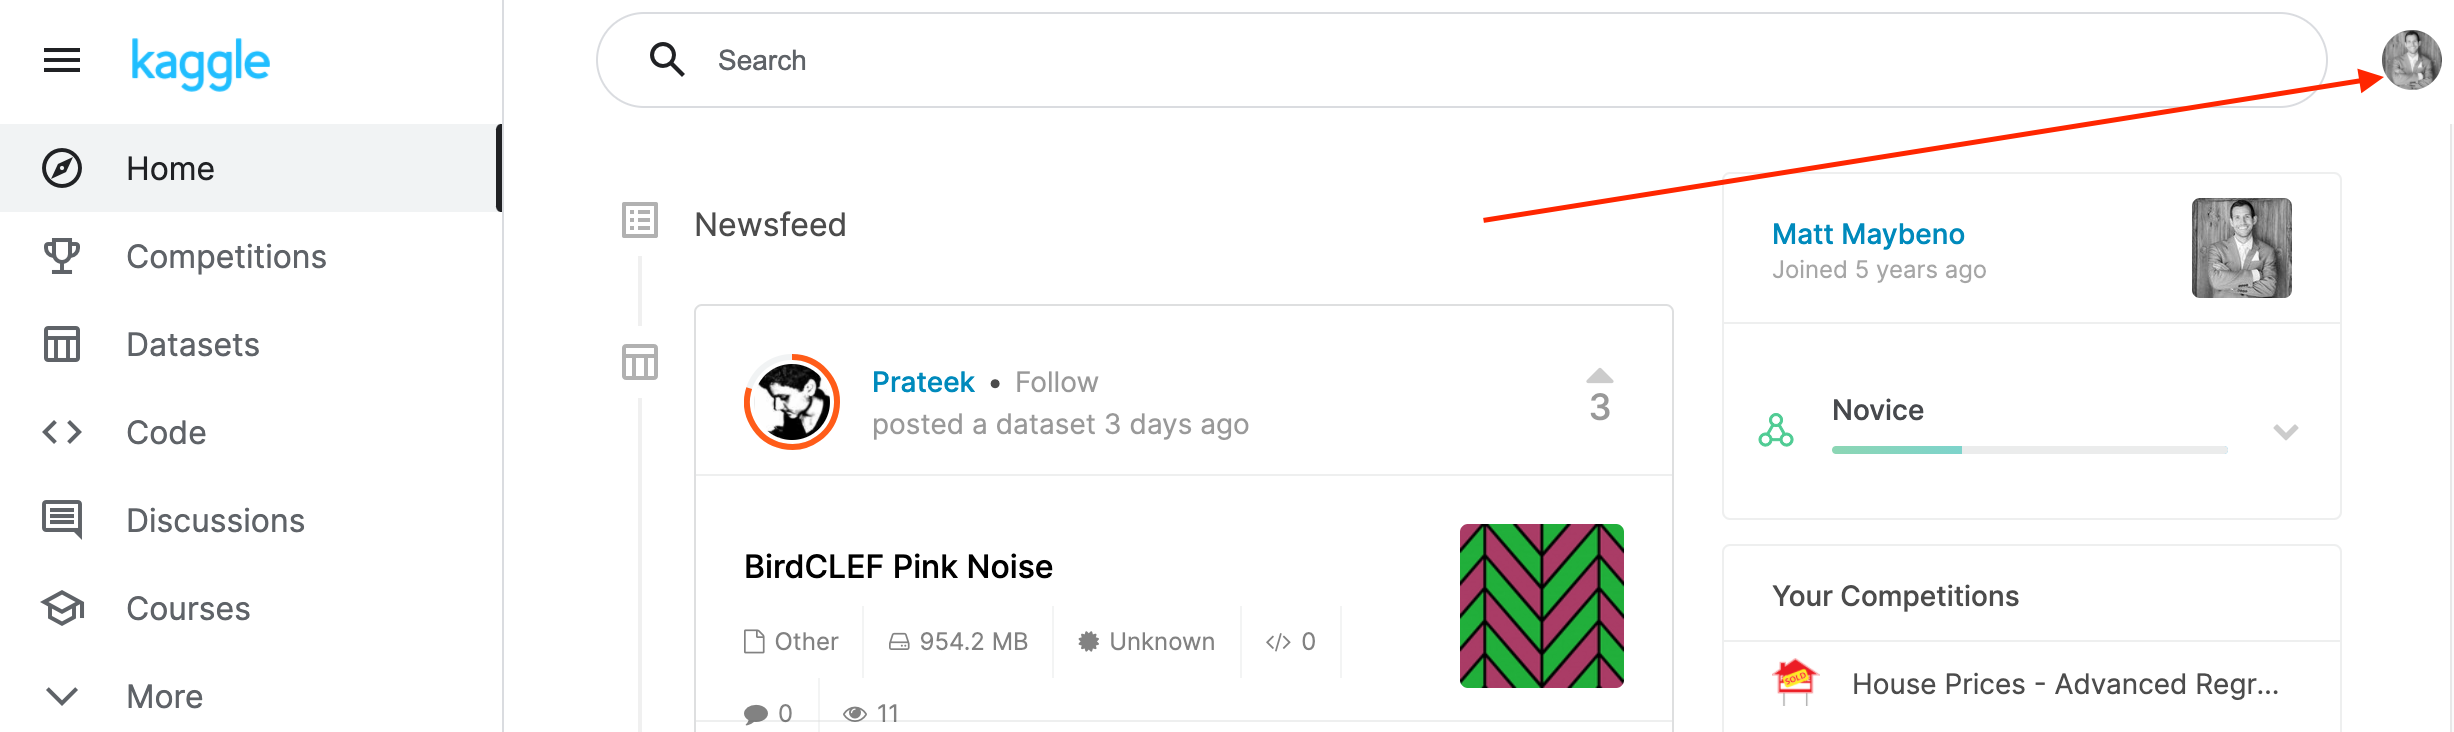
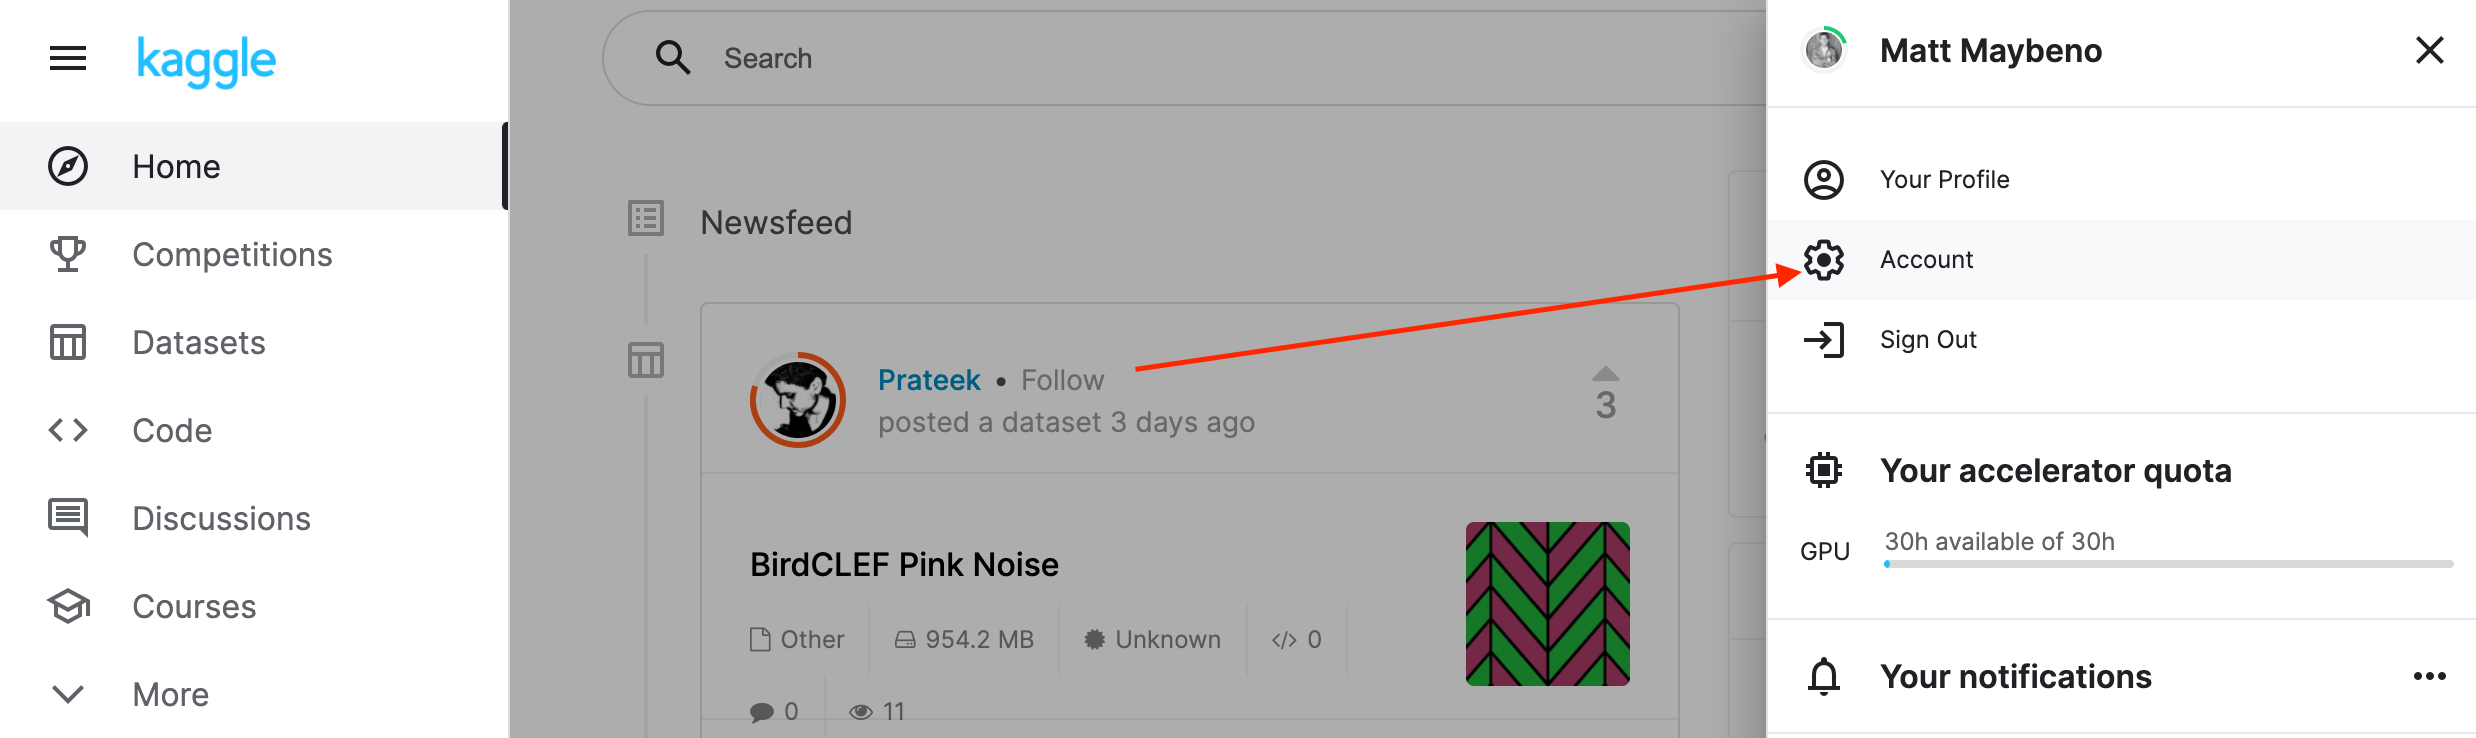
2. Scroll down to API and click Create New API Token.
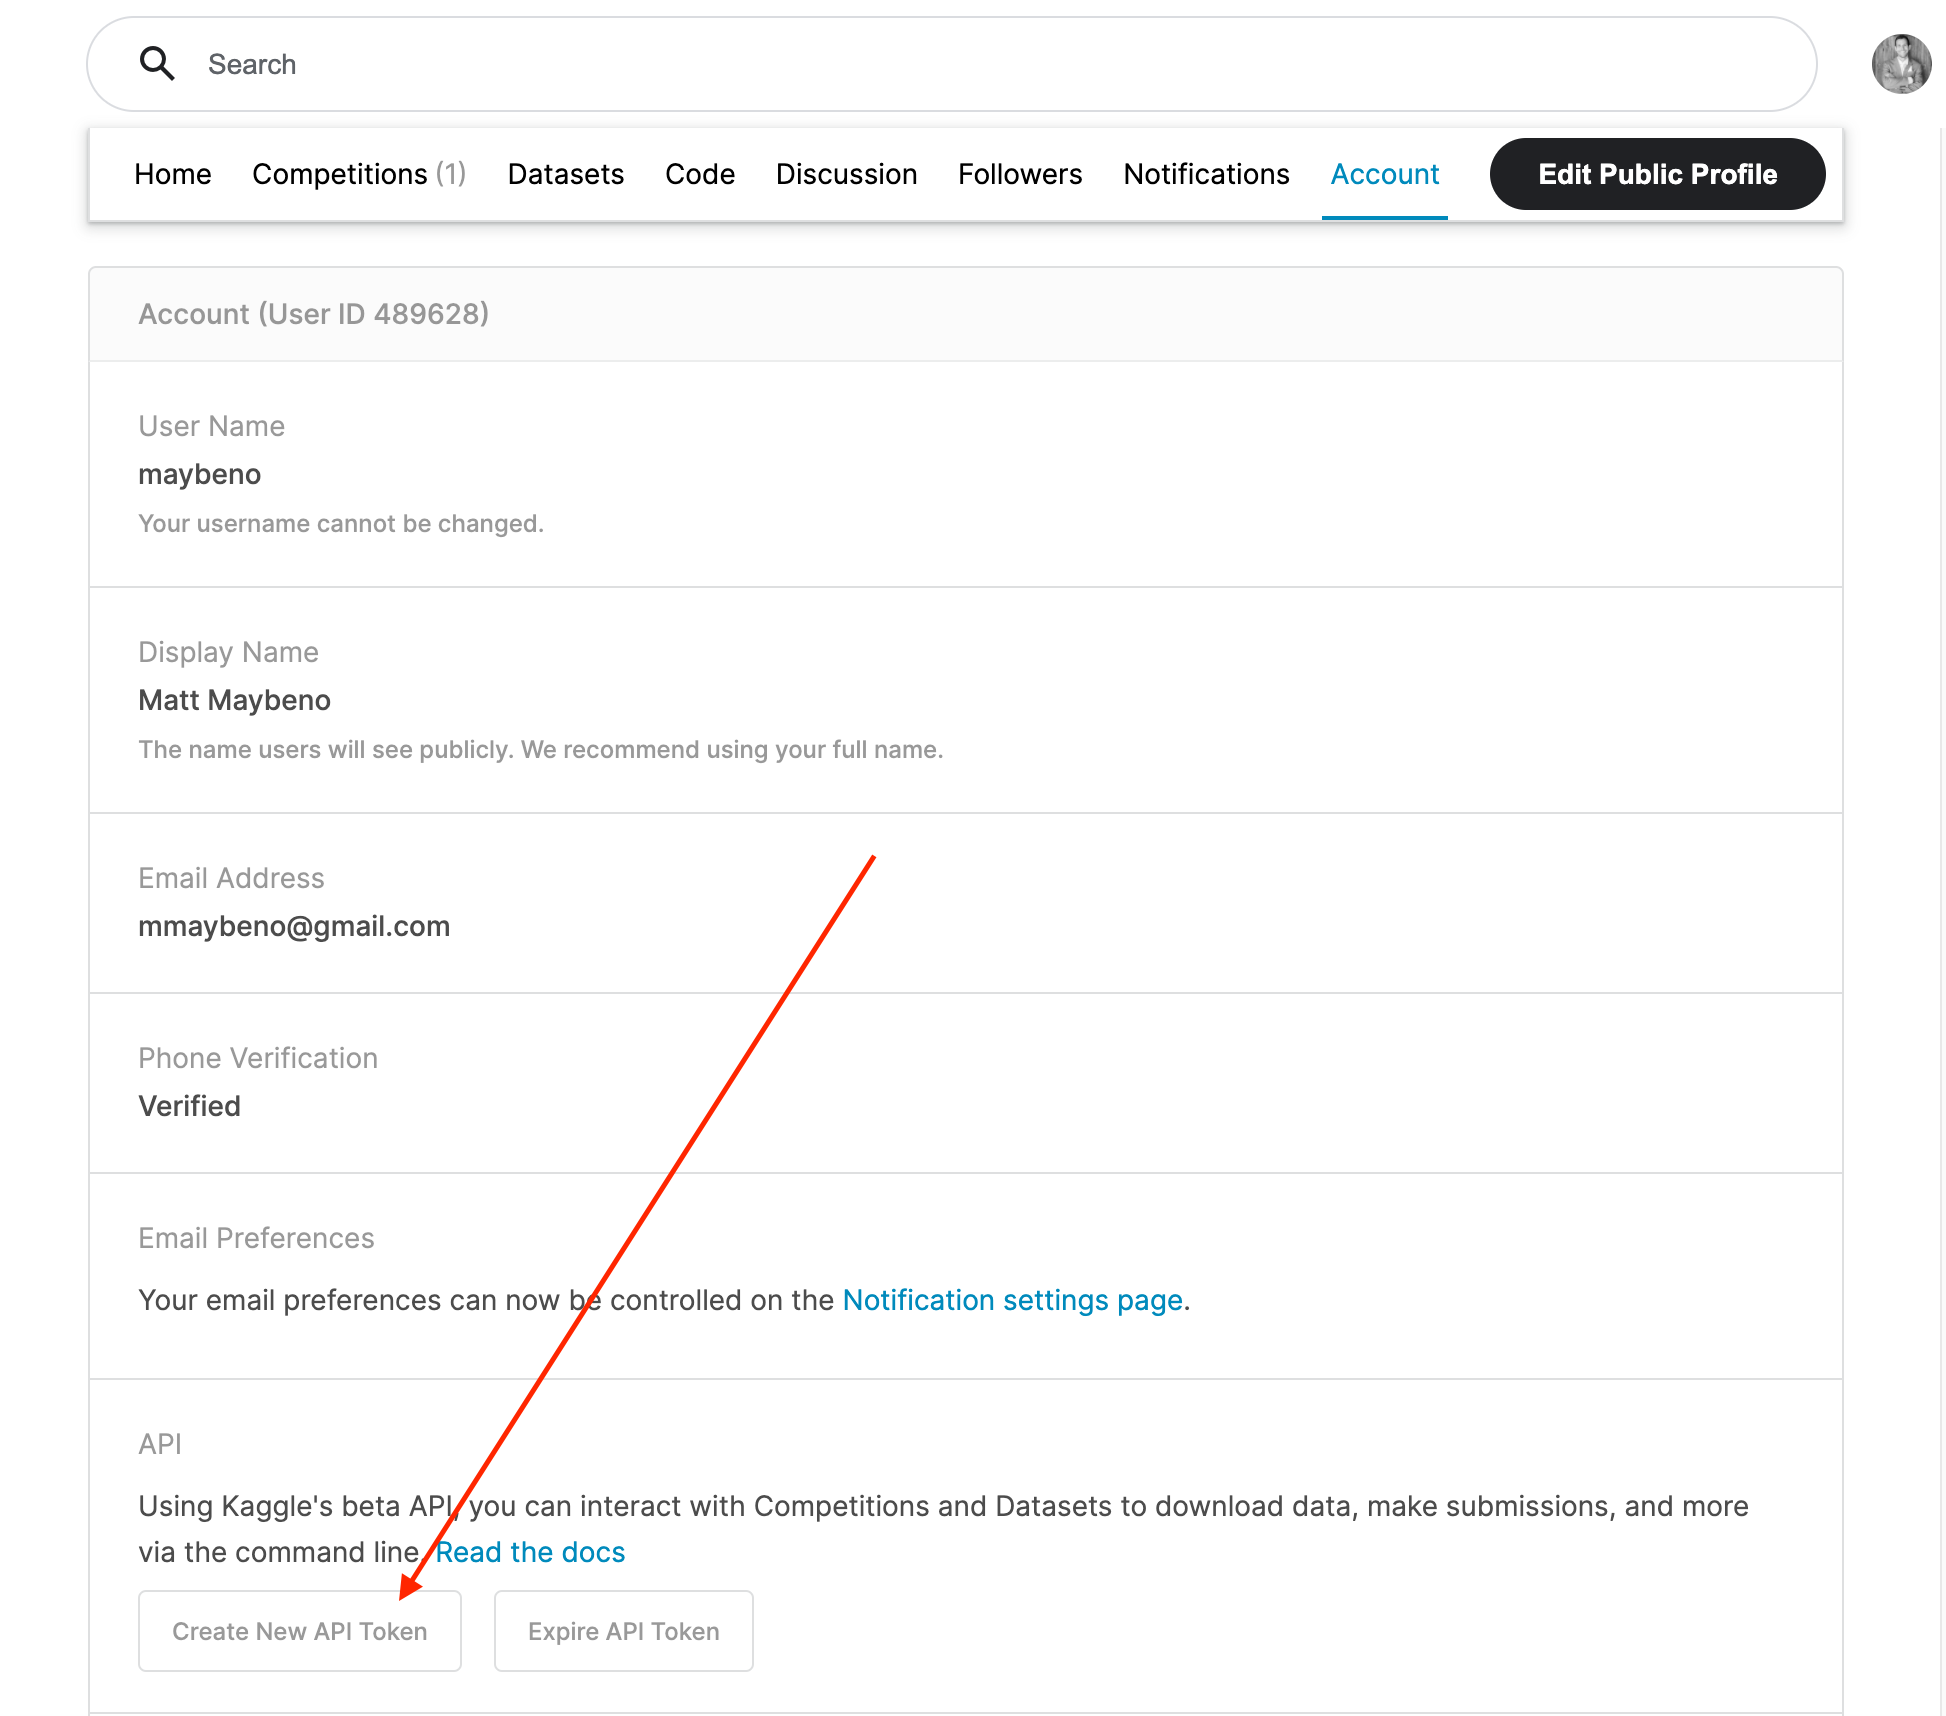
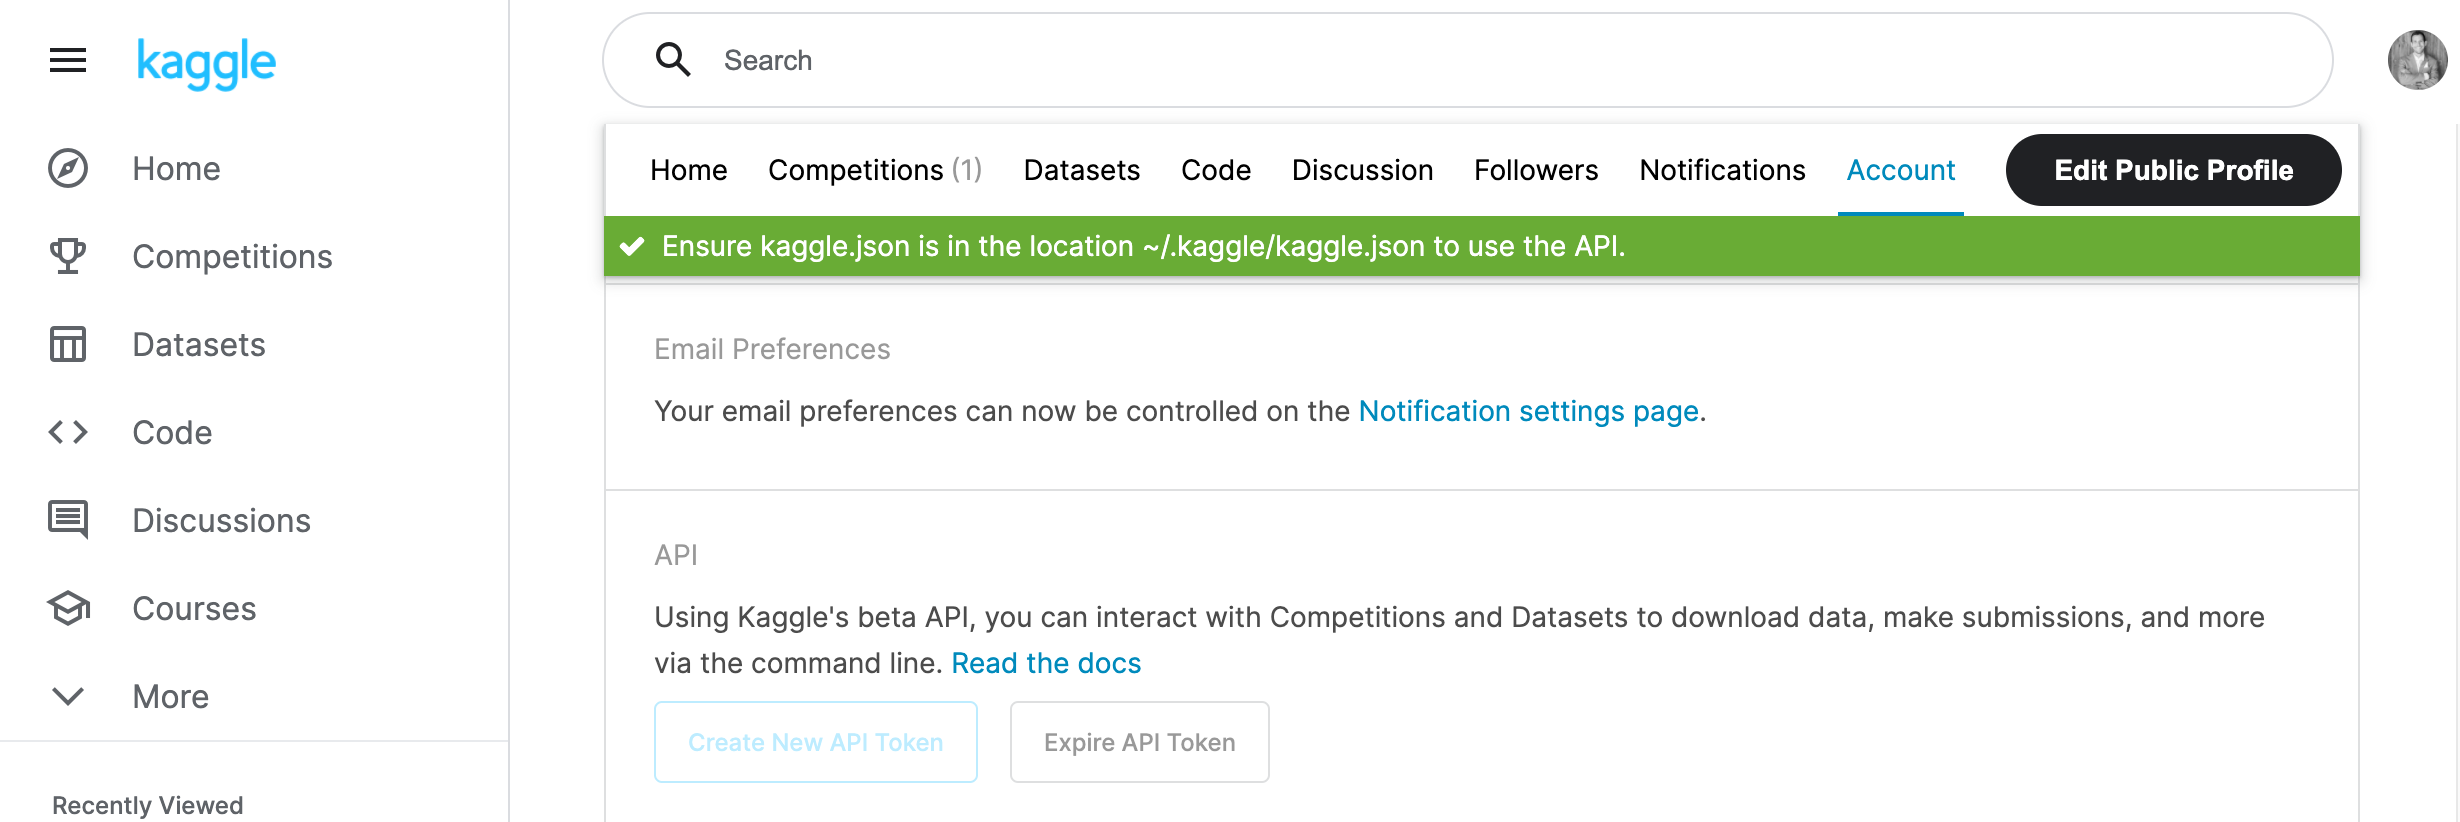
3. Open up `kaggle.json` and use the username and key.
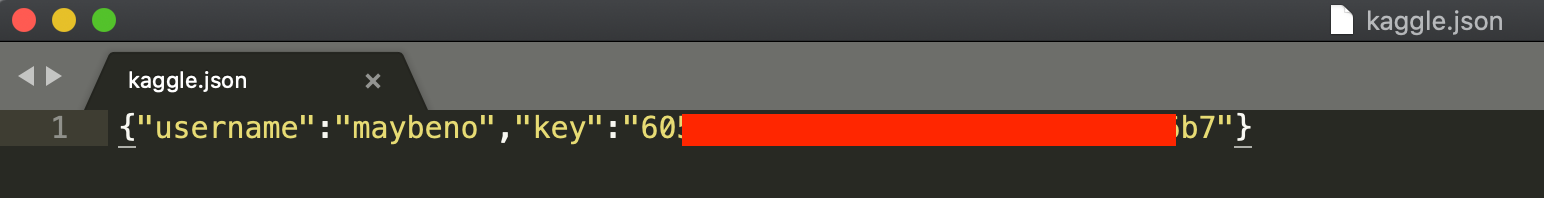

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
# Update pip, setuptools, and wheel
!pip install -U pip setuptools wheel
# Install a working version of bokeh
!pip install "bokeh>=2.4.3,<3"
# Install mxnet and autogluon
!pip install "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

### Setup Kaggle API Key

In [28]:
import os
from pathlib import Path

# Set the path to the Kaggle directory in the user's home folder
kaggle_dir = Path.home() / ".kaggle"
kaggle_dir.mkdir(exist_ok=True)

# Save the kaggle.json file
kaggle_json_path = kaggle_dir / "kaggle.json"

# Example: writing credentials (replace with your actual credentials securely)
kaggle_credentials = {
    "username": "",
    "key": ""
}

# Write JSON credentials
import json
with open(kaggle_json_path, "w") as f:
    json.dump(kaggle_credentials, f)

# Set permissions
os.chmod(kaggle_json_path, 0o600)

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
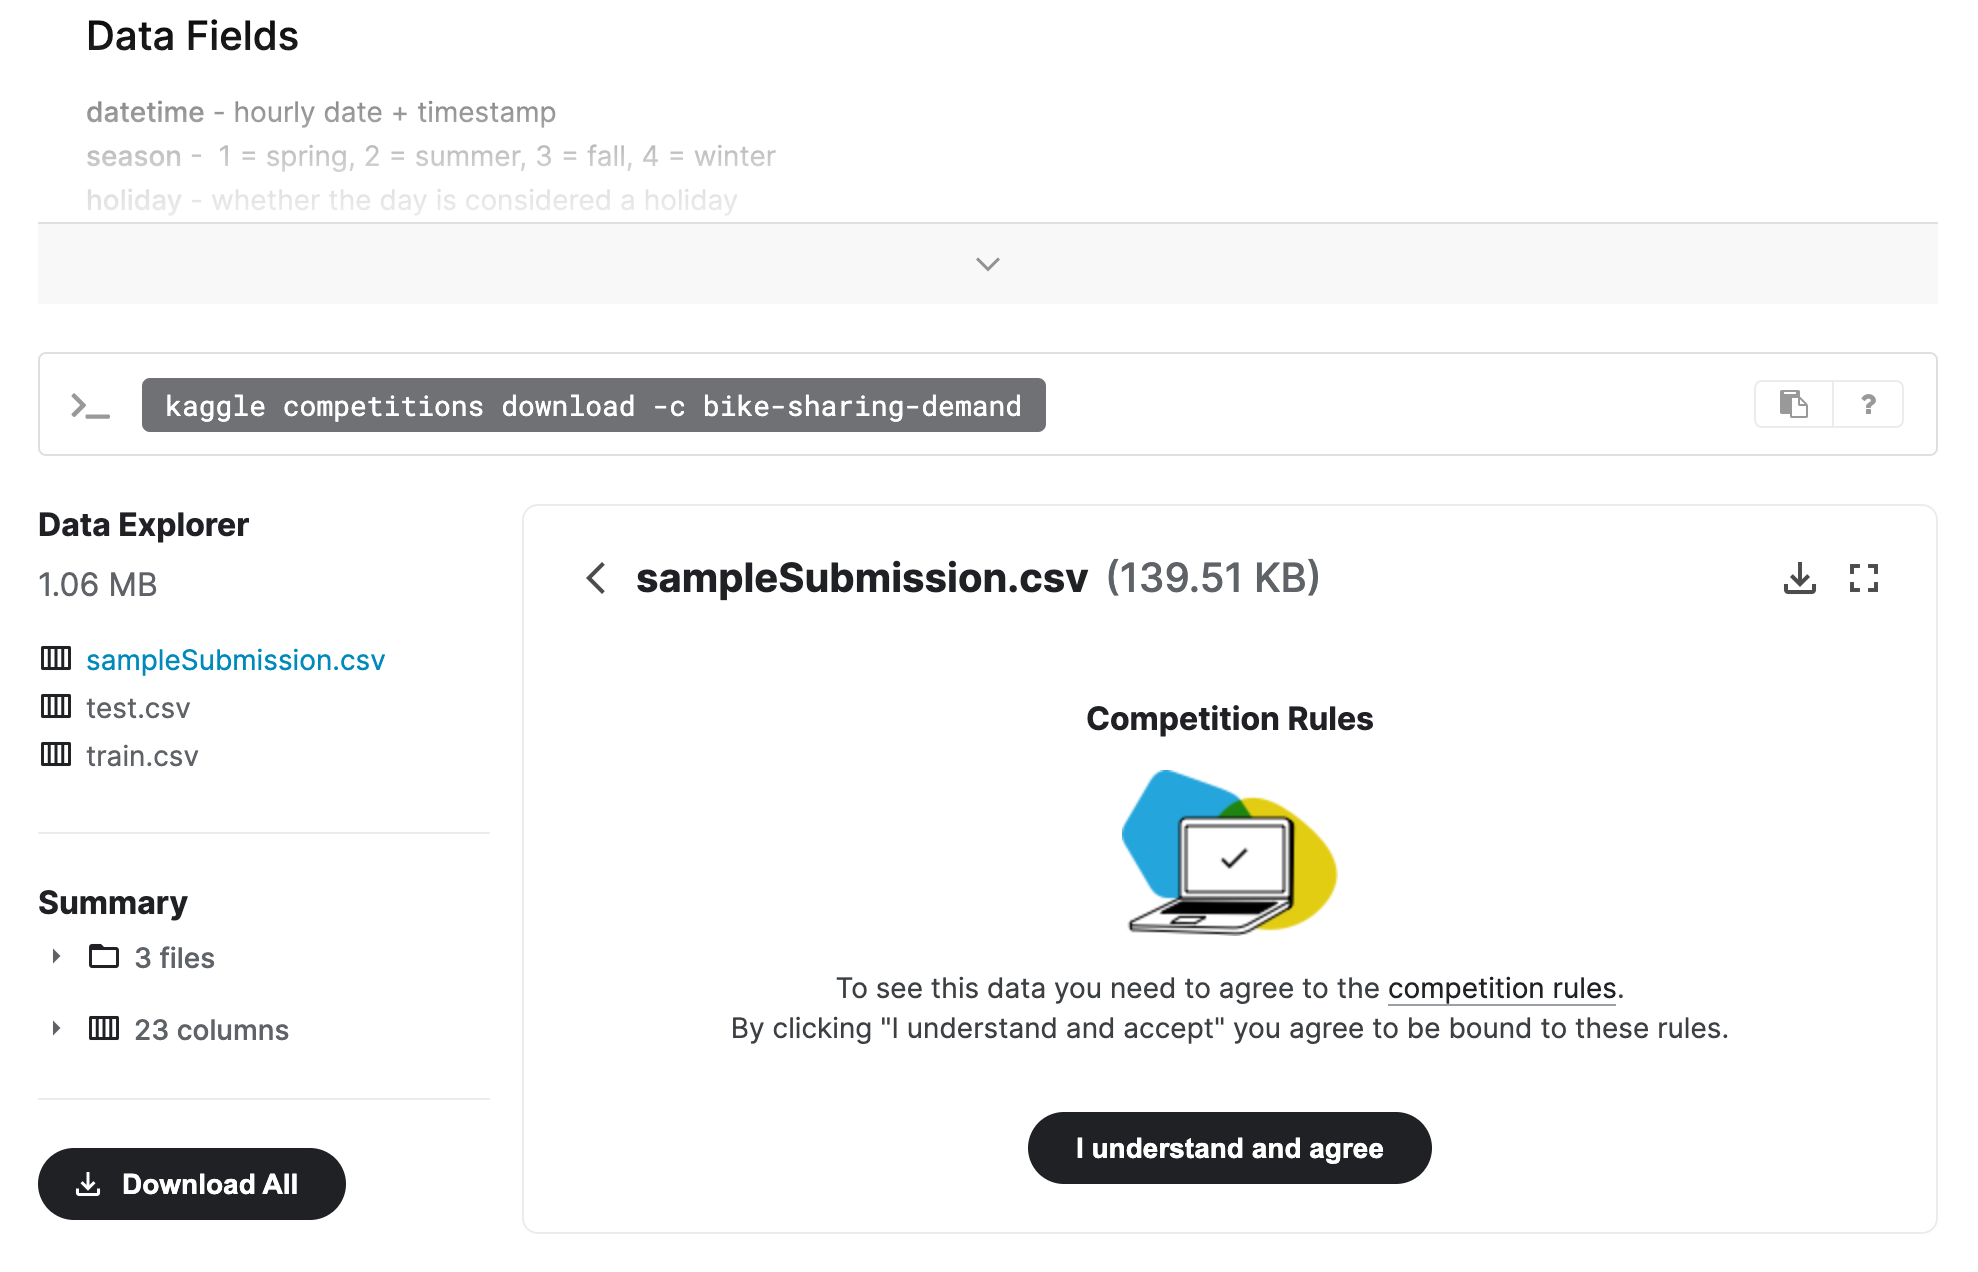

In [3]:
# !pip install kaggle

In [110]:
# !kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [111]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
print("Train data loaded successfully with shape:", train.shape)
train.head()

Train data loaded successfully with shape: (10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [112]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
print("\nTraining data summary statistics:")
train.describe()


Training data summary statistics:


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [113]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
print("Test data loaded successfully with shape:", test.shape)
test.head()

Test data loaded successfully with shape: (6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [114]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
print("Submission template loaded successfully with shape:", submission.shape)
submission.head()

Submission template loaded successfully with shape: (6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [56]:
# Define the columns to exclude from training
# We are predicting count, so it is the label
# We exclude casual and registered as they're not in the test dataset
# We also exclude datetime as we'll extract features from it later
exclude_columns = ['casual', 'registered', 'datetime']

In [14]:
# Set up the TabularPredictor with appropriate parameters
print("\nTraining initial model...")
predictor = TabularPredictor(
    label='count',                          # Target variable to predict
    eval_metric='root_mean_squared_error',  # Evaluation metric
    path='models/ag_models'  # Path to save models
).fit(
    train_data=train.drop(exclude_columns, axis=1),  # Remove excluded columns
    time_limit=600,                                  # 10 minutes time limit
    presets='best_quality'                           # Use best quality preset
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 19 16:54:57 UTC 2025
CPU Count:          2
Memory Avail:       1.87 GB / 3.76 GB (49.8%)
Disk Space Avail:   2.06 GB / 4.99 GB (41.2%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subse


Training initial model...


	Running DyStack sub-fit in a ray process to avoid memory leakage. Enabling ray logging (enable_ray_logging=True). Specify `ds_args={'enable_ray_logging': False}` if you experience logging issues.
2025-05-19 22:34:42,243	WARNING services.py:2022 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 411021312 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=0.91gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2025-05-19 22:34:43,520	INFO worker.py:1812 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
		Context path: "/home/sagemaker-user/cd0385-project-starter/project/ag_models/ds_sub_fit/sub_fit_ho"
(_dystack pid=2201) Running DyStack sub-fit ...
(_dystack pid=2201) Beginning AutoGluon 

(_ray_fit pid=2334) [1000]	valid_set's rmse: 144.608
(_ray_fit pid=2403) [1000]	valid_set's rmse: 141.546 [repeated 7x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=2502) [1000]	valid_set's rmse: 150.798 [repeated 2x across cluster]
(_ray_fit pid=2569) [1000]	valid_set's rmse: 151.752


(_dystack pid=2201) 	-145.9501	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2201) 	29.76s	 = Training   runtime
(_dystack pid=2201) 	2.58s	 = Validation runtime
(_dystack pid=2201) Fitting model: LightGBM_BAG_L1 ... Training model for up to 59.83s of the 107.86s of remaining time.
(_dystack pid=2201) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.33%)
(_dystack pid=2201) 	-145.0304	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2201) 	20.64s	 = Training   runtime
(_dystack pid=2201) 	0.17s	 = Validation runtime
(_dystack pid=2201) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 35.93s of the 83.96s of remaining time.
(_dystack pid=2201) 	-150.9358	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2201) 	7.44s	 = Training   runtime
(_dystack pid=2201) 	0.55s	 = Validation runtime
(_dystack pid=2201) Fitting model: CatBoost_BAG_L1 ... Training

### Review AutoGluon's training run with ranking of models that did the best.

In [15]:
# Review AutoGluon's training run with ranking of models
print("\nInitial model training summary:")
predictor.fit_summary()


Initial model training summary:
*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -140.327593  root_mean_squared_error       6.003758  375.070073                0.000766           0.080477            3       True         16
1          CatBoost_BAG_L2 -140.992313  root_mean_squared_error       5.111645  307.497144                0.141542          30.584689            2       True         15
2        LightGBMXT_BAG_L2 -141.141341  root_mean_squared_error       5.159349  300.546604                0.189247          23.634149            2       True         12
3      WeightedEnsemble_L2 -141.613610  root_mean_squared_error       3.677211  191.774979                0.001212           0.055576            2       True         11
4          LightGBM_BAG_L2 -141.662431  root_mean_squared_er

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -160.51746660830347,
  'KNeighborsDist_BAG_L1': -169.654635341

### Create predictions from test dataset

In [16]:
# Create predictions from test dataset
print("\nGenerating predictions for test data...")
predictions = predictor.predict(test.drop(['datetime'], axis=1)) 
print("Preview of predictions:")
print(predictions.head())


Generating predictions for test data...


/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

Preview of predictions:
0    128.833664
1     62.247528
2     62.247528
3     82.025482
4     82.025482
Name: count, dtype: float32


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [17]:
# Describe the `predictions` series to see if there are any negative values
print("\nPrediction statistics:")
print(predictions.describe())


Prediction statistics:
count    6493.000000
mean      190.447739
std       110.547951
min        18.761837
25%       104.505714
50%       161.555756
75%       263.390625
max       615.210083
Name: count, dtype: float64


In [18]:
# Count negative values
negative_count = (predictions < 0).sum()
print(f"Number of negative predictions: {negative_count}")

Number of negative predictions: 0


In [19]:
# Set negative predictions to zero
predictions = predictions.clip(lower=0)
print("After clipping, minimum prediction value:", predictions.min())

After clipping, minimum prediction value: 18.761837


### Set predictions to submission dataframe, save, and submit

In [20]:
# Set predictions to submission dataframe and save
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)
print("Initial submission file saved.")

Initial submission file saved.


In [25]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 506kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [26]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                        description           status                     publicScore  privateScore  
--------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission.csv  2025-05-19 22:50:28.533000  first raw submission  SubmissionStatus.COMPLETE  1.32218      1.32218       


#### Initial score of `1.32218`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Generating feature histograms for EDA...


<Figure size 1500x1200 with 0 Axes>

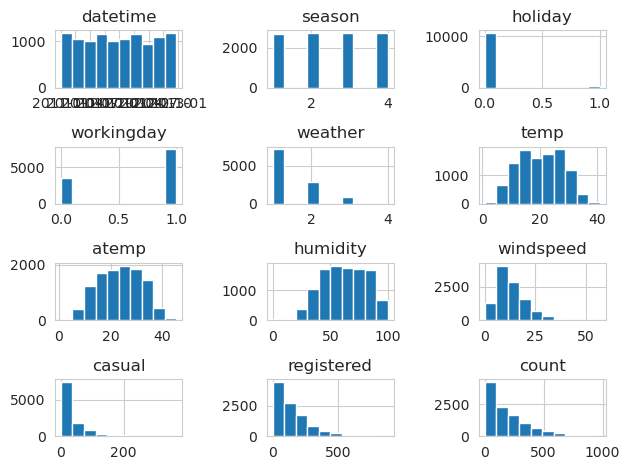

In [117]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
print("\nGenerating feature histograms for EDA...")
plt.figure(figsize=(15, 12))
train.hist()
plt.tight_layout()
plt.show()

# Visualization
Since visualization also help us understand more our data, let us some visualizations

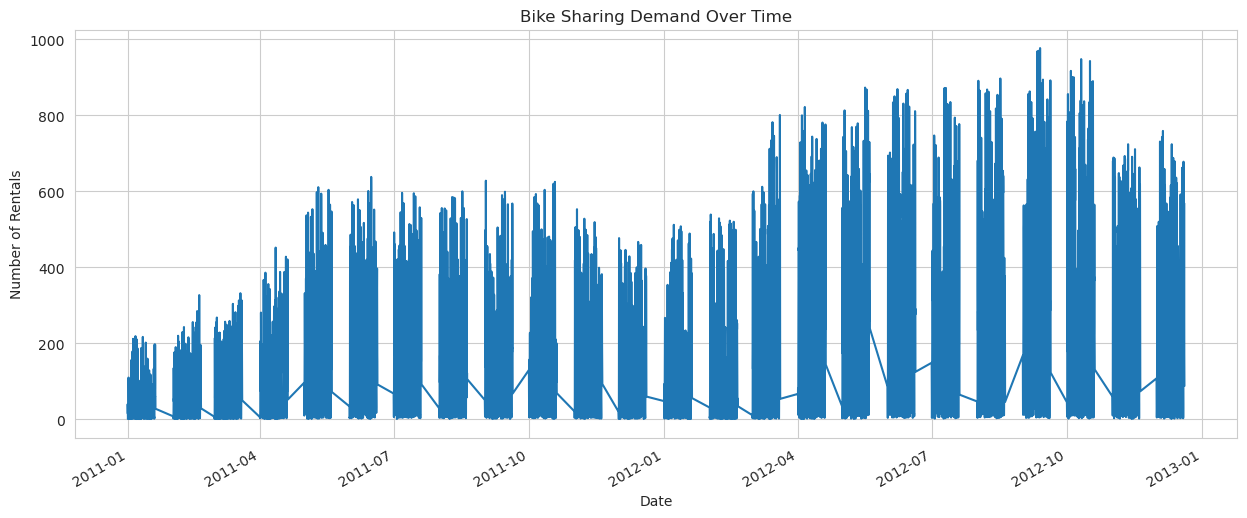

In [118]:
# Time series of demand
plt.figure(figsize=(15, 6))
train.set_index('datetime')['count'].plot()
plt.title('Bike Sharing Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()

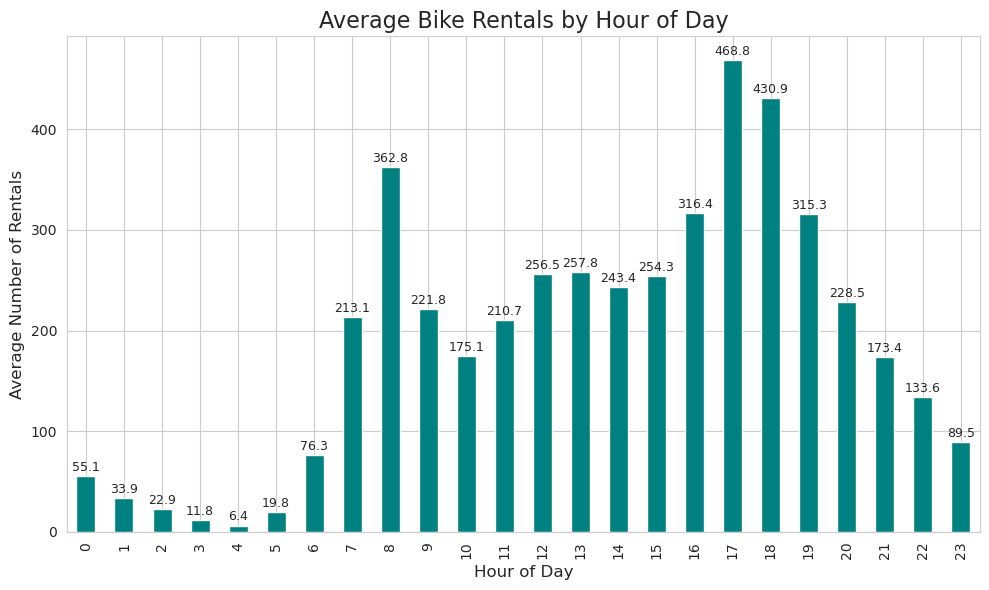

In [119]:
# Create figure and axis
fig, ax2 = plt.subplots(figsize=(10, 6))

# Average demand by hour
hourly_avg = train.groupby(train['datetime'].dt.hour)['count'].mean()
hourly_avg.plot(kind='bar', ax=ax2, color='teal')

# Set labels and title
ax2.set_title('Average Bike Rentals by Hour of Day', fontsize=16)
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Average Number of Rentals', fontsize=12)
ax2.grid(True, axis='y')

# Add value labels above bars
for i, v in enumerate(hourly_avg):
    ax2.text(i, v + 5, f'{v:.1f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

The numbers at the top of the bars represent the average number of bike rentals for each hour of the day across the entire dataset.
    
For example:

- Hour 17 (5 PM) shows 468.8, meaning on average about 469 bikes were rented during the 5-6 PM hour
    
- Hour 18 (6 PM) shows 430.9, about 431 bikes on average
    
- Hour 8 (8 AM) shows 362.8, about 363 bikes on average

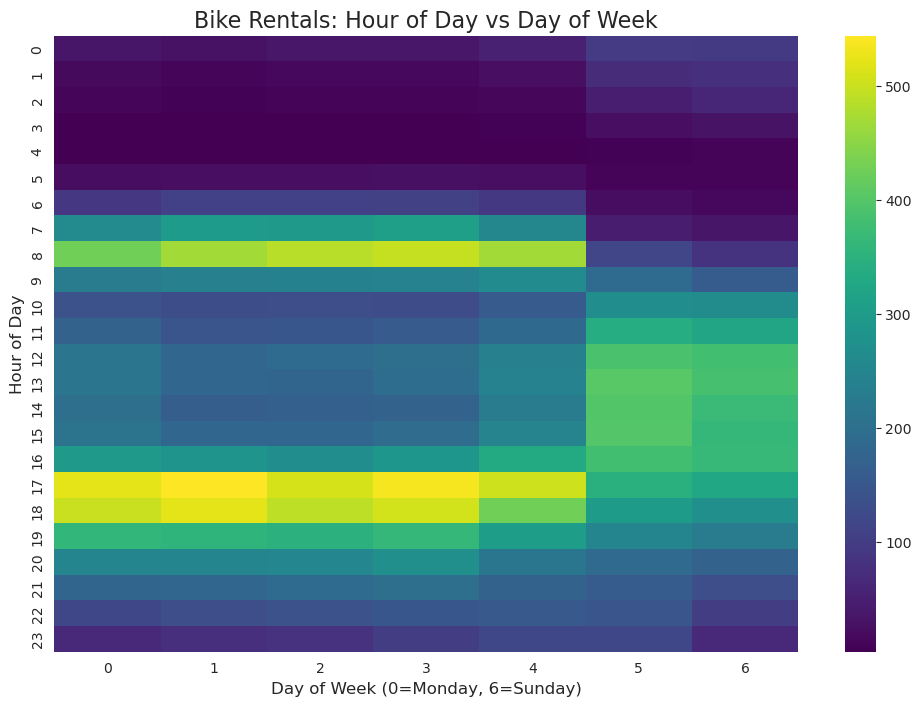

In [120]:
# Create a heatmap showing hour of day vs day of week
plt.figure(figsize=(12, 8))
hour_day_heatmap = train.pivot_table(
    index=train['datetime'].dt.hour,
    columns=train['datetime'].dt.dayofweek,
    values='count', 
    aggfunc='mean'
)
sns.heatmap(hour_day_heatmap, cmap='viridis', annot=False, fmt='.0f')
plt.title('Bike Rentals: Hour of Day vs Day of Week', fontsize=16)
plt.xlabel('Day of Week (0=Monday, 6=Sunday)', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)
plt.show()

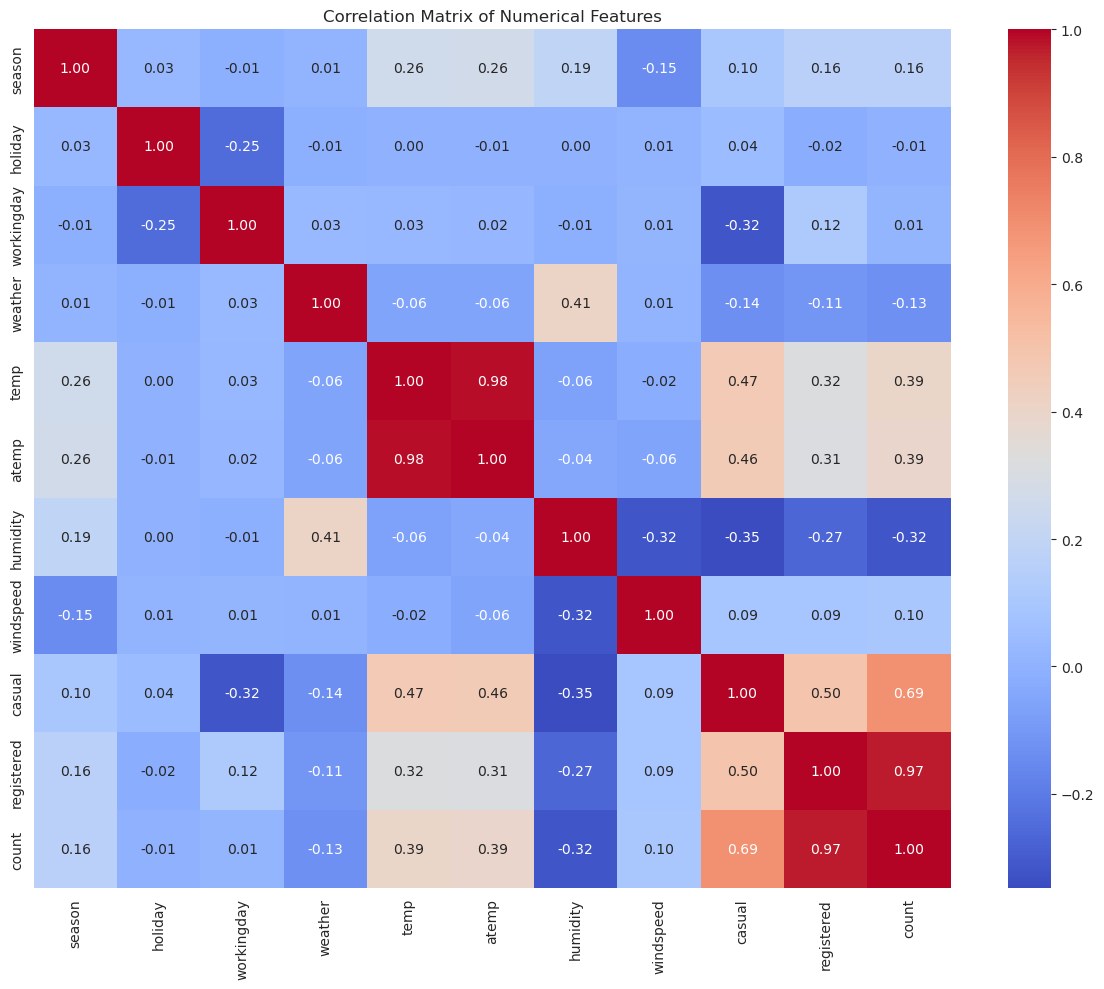

In [124]:
# Correlation analysis of numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = train.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

As we can see, these visualizations are already giving us inportant informations and patterns to start thinking our we can
structure our feature engineering steps.

In [121]:
print("\nTraining data shape:", train.shape)
print("Test data shape:", test.shape)
print("\nTraining data info:")
train.info()


Training data shape: (10886, 12)
Test data shape: (6493, 9)

Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [122]:
print("\nSummary statistics:")
print(train.describe())


Summary statistics:
                            datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%              2012-01-01 20:30:00      3.000000      0.000000   
75%              2012-07-01 12:45:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.116174      0.166599   

         workingday       weather         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.680875      1.418427     20.23086     23.655084     61.886460   
min        0.000000      1.000000      0.82000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000     16.

In [123]:
# Check for missing values
print("\nMissing values in training data:")
print(train.isnull().sum())
print("\nMissing values in test data:")
print(test.isnull().sum())


Missing values in training data:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Missing values in test data:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


## Feature Engineering and Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [125]:
# Create new datetime-based features
print("\nExtracting datetime features...")
# Extract hour from datetime - this is likely an important predictor for bike demand
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

# Extract additional potentially useful datetime features
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
train['dayofweek'] = train['datetime'].dt.dayofweek
train['year'] = train['datetime'].dt.year

test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month
test['dayofweek'] = test['datetime'].dt.dayofweek
test['year'] = test['datetime'].dt.year


Extracting datetime features...


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [126]:
# Set categorical features to the correct dtype
# This helps AutoGluon identify these as categorical variables rather than continuous
print("\nConverting categorical features to proper data types...")
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
train["hour"] = train["hour"].astype('category')
train["month"] = train["month"].astype('category')
train["dayofweek"] = train["dayofweek"].astype('category')

test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')
test["hour"] = test["hour"].astype('category')
test["month"] = test["month"].astype('category')
test["dayofweek"] = test["dayofweek"].astype('category')


Converting categorical features to proper data types...


In [128]:
# View the updated dataset
print("\nUpdated training data with new features:")
train.head()


Updated training data with new features:


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,dayofweek,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,5,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,5,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,5,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,5,2011



Generating updated feature histograms...


<Figure size 1500x1200 with 0 Axes>

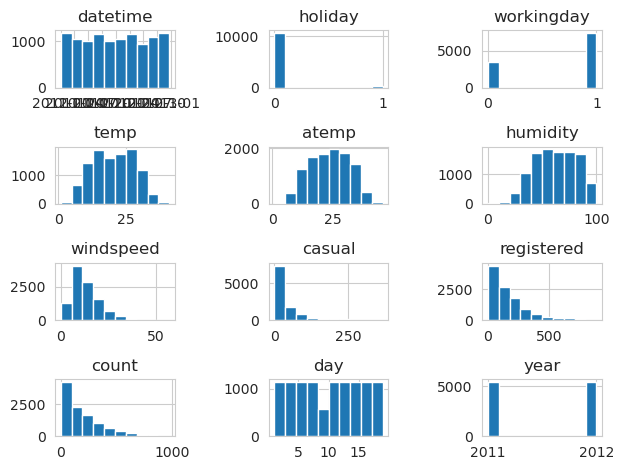

In [130]:
# Generate histograms with new features to see their distributions
print("\nGenerating updated feature histograms...")
plt.figure(figsize=(15, 12))
train.hist()
plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [42]:
# Define columns to exclude from training - same as before
exclude_columns_enhanced = ['casual', 'registered', 'datetime']

In [43]:
# Train a new model with the enhanced feature set
print("\nTraining model with enhanced features...")
predictor_new_features = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error',
    path='models/ag_models_enhanced'
).fit(
    train_data=train.drop(exclude_columns_enhanced, axis=1),
    time_limit=600,
    presets='best_quality'
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 19 16:54:57 UTC 2025
CPU Count:          2
Memory Avail:       0.98 GB / 3.76 GB (26.2%)
Disk Space Avail:   1.21 GB / 4.99 GB (24.3%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subse


Training model with enhanced features...


Leaderboard on holdout data (DyStack):
                    model  score_holdout   score_val              eval_metric  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3     -39.078154  -39.640883  root_mean_squared_error        1.553844       0.311683   54.517780                 0.001801                0.000839           0.080879            3       True         10
1     WeightedEnsemble_L2     -39.078154  -39.640883  root_mean_squared_error        1.556169       0.311634   54.507198                 0.004126                0.000789           0.070297            2       True          7
2  RandomForestMSE_BAG_L1     -40.827295  -41.055410  root_mean_squared_error        0.317818       0.138209    3.407675                 0.317818                0.138209           3.407675            1       True          5
3         CatBoost_BAG_L1     -43.752632  -45.952231  root_mean_s

In [44]:
# Review the model training summary
print("\nEnhanced model training summary:")
predictor_new_features.fit_summary()


Enhanced model training summary:
*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -34.016222  root_mean_squared_error      10.971797  410.596387                0.000961           0.069668            3       True         14
1      WeightedEnsemble_L2  -34.162302  root_mean_squared_error       8.964122  257.248713                0.000906           0.061614            2       True          9
2          CatBoost_BAG_L2  -34.662665  root_mean_squared_error       9.943403  345.547987                0.163359          42.095023            2       True         13
3          LightGBM_BAG_L2  -34.683272  root_mean_squared_error       9.942165  326.974180                0.162121          23.521216            2       True         11
4        LightGBMXT_BAG_L1  -34.971704  root_mean_squared_e

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -158.59818830173552,
  'KNeighborsDist_BAG_L1': -162.5461486475877,
  'LightGBMXT_BAG_L1': -34.97170359268046,
  'LightGBM_BAG_L1': -35.97210082374322,
  'RandomForestMSE_BAG_L1': -39.170

In [45]:
# Generate predictions on the test set
print("\nGenerating predictions with enhanced model...")
predictions_new_features = predictor_new_features.predict(test.drop(['datetime'], axis=1))
print("Preview of enhanced predictions:")
print(predictions_new_features.head())


Generating predictions with enhanced model...


/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

Preview of enhanced predictions:
0    14.462849
1     4.175704
2     3.740210
3     3.813783
4     3.710319
Name: count, dtype: float32


In [46]:
# Handle negative predictions
negative_count_new = (predictions_new_features < 0).sum()
print(f"Number of negative predictions: {negative_count_new}")
predictions_new_features = predictions_new_features.clip(lower=0)
print("After clipping, minimum prediction value:", predictions_new_features.min())

Number of negative predictions: 20
After clipping, minimum prediction value: 0.0


In [47]:
# Create a new submission with enhanced predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)
print("Enhanced features submission file saved.")

Enhanced features submission file saved.


In [48]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 751kB/s]
Successfully submitted to Bike Sharing Demand

In [49]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-05-19 23:18:55.903000  new features          SubmissionStatus.COMPLETE  0.47449      0.47449       
submission.csv               2025-05-19 22:50:28.533000  first raw submission  SubmissionStatus.COMPLETE  1.32218      1.32218       


#### New Score of `0.47449`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [80]:
# Define hyperparameter search space for specific models
print("\nTraining model with hyperparameter optimization...")
hyperparameters = {
    'GBM': [
        # Default LightGBM
        {},
        # Extra Trees variant of LightGBM (your top performer)
        {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
        # Custom-tuned LightGBM with more complex trees
        {
            'learning_rate': 0.01,
            'num_leaves': 128,
            'feature_fraction': 0.8,
            'min_data_in_leaf': 5,
            'num_boost_round': 500,
            'reg_alpha': 0.1,
            'reg_lambda': 1.0,
            'ag_args': {'name_suffix': 'Tuned'}
        }
    ],
    'CAT': [
        # Default CatBoost
        {},
        # Custom-tuned CatBoost
        {
            'depth': 8,
            'learning_rate': 0.02,
            'l2_leaf_reg': 3.0,
            'grow_policy': 'Depthwise',
            'iterations': 500,
            'ag_args': {'name_suffix': 'Tuned'}
        }
    ],
    'RF': [
        # Random Forest for regression (performed well on the first model)
        {'criterion': 'squared_error', 'max_depth': 15, 'n_estimators': 300, 
         'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}
    ],
    'XT': [
        # Extra Trees
        {'criterion': 'squared_error', 'max_depth': 15, 'n_estimators': 300,
         'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}
    ]
}


Training model with hyperparameter optimization...


Hyperameters tuning is a long, and iterative process to find where the best parameters are.
I will only focus on these to see how they can improve my score

In [81]:
# Train model with targeted hyperparameters
predictor_new_hpo = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error',
    path='ag_models_optimized'
).fit(
    train_data=train.drop(exclude_columns_enhanced, axis=1),
    time_limit=600,  # Increase time limit to accommodate hyperparameter tuning
    presets='best_quality',
    hyperparameters=hyperparameters,
    num_stack_levels=2,  # Stick with 2 levels for faster training
    num_bag_folds=8,  # Keep the same number of folds as previous run
    save_space=True  # To manage disk space issues you mentioned in logs
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 19 16:54:57 UTC 2025
CPU Count:          8
Memory Avail:       26.51 GB / 30.89 GB (85.8%)
Disk Space Avail:   3.28 GB / 4.99 GB (65.7%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on sub

In [82]:
# Review the model training summary
print("\nHPO model training summary:")
predictor_new_hpo.fit_summary()


HPO model training summary:
*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L4 -33.871279  root_mean_squared_error      11.597796  242.302628                0.000586           0.035247            4       True         24
1      WeightedEnsemble_L3 -33.998981  root_mean_squared_error       9.575807  215.409112                0.000546           0.020354            3       True         16
2      WeightedEnsemble_L2 -34.113716  root_mean_squared_error       7.328792  150.125402                0.000538           0.019466            2       True          8
3     CatBoostTuned_BAG_L2 -34.198923  root_mean_squared_error       9.037034  192.054087                0.175340          24.214552            2       True         14
4     ExtraTreesMSE_BAG_L2 -34.265708  root_mean_squared_error       

{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBMTuned_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'CatBoostTuned_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBMTuned_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'CatBoostTuned_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBM_BAG_L3': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L3': 'StackerEnsembleModel_LGB',
  'LightGBMTuned_BAG_L3': 'StackerE

In [83]:
# Generate predictions with the HPO model
print("\nGenerating predictions with HPO model...")
predictions_new_hpo = predictor_new_hpo.predict(test.drop(['datetime'], axis=1))
print("Preview of HPO predictions:")
print(predictions_new_hpo.head())


Generating predictions with HPO model...
Preview of HPO predictions:
0    13.027966
1     4.775597
2     4.146764
3     3.889573
4     3.697057
Name: count, dtype: float32


In [84]:
# Handle negative predictions
negative_count_hpo = (predictions_new_hpo < 0).sum()
print(f"Number of negative predictions: {negative_count_hpo}")
predictions_new_hpo = predictions_new_hpo.clip(lower=0)
print("After clipping, minimum prediction value:", predictions_new_hpo.min())

Number of negative predictions: 3
After clipping, minimum prediction value: 0.0


In [85]:
# Create a new submission with HPO predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)
print("HPO model submission file saved.")

HPO model submission file saved.


In [86]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 662kB/s]
Successfully submitted to Bike Sharing Demand

In [87]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-05-20 02:31:43.267000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.45061      0.45061       
submission_new_hpo.csv       2025-05-20 01:20:13.027000  new features with hyperparameters  SubmissionStatus.COMPLETE  1.19602      1.19602       
submission_new_hpo.csv       2025-05-20 00:54:07.463000  new features with hyperparameters  SubmissionStatus.COMPLETE  1.29047      1.29047       
submission_new_features.csv  2025-05-19 23:18:55.903000  new features                       SubmissionStatus.COMPLETE  0.47449      0.47449       


#### New Score of `0.45061`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

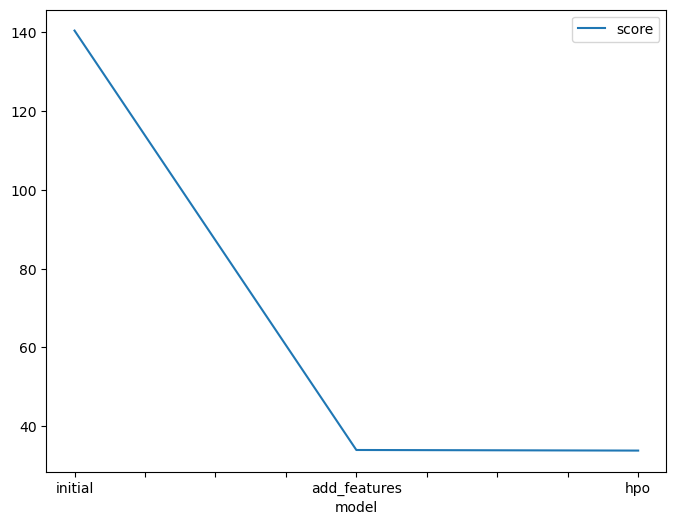

In [88]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
# Creating a DataFrame to track model improvement
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [140.33, 34.02, 33.87]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

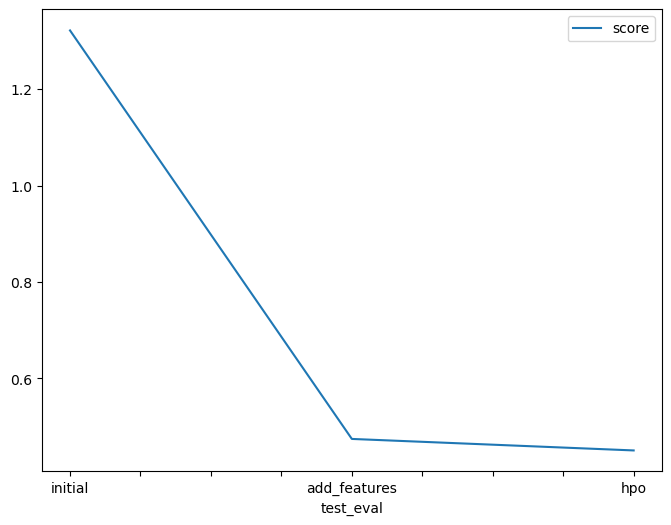

In [89]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.32218, 0.47449, 0.45061]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [91]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "learning_rate: 0.01"],
    "hpo2": ["default", "default", "num_leaves: 128"],
    "hpo3": ["default", "default", "depth: 8"],
    "score": [1.32218, 0.47449, 0.45061]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.32218
1,add_features,default,default,default,0.47449
2,hpo,learning_rate: 0.01,num_leaves: 128,depth: 8,0.45061


# Conclusion

Our bike sharing demand prediction model evolved through three key stages, demonstrating significant improvement with each iteration. The initial model established a baseline score of 1.32218 using basic features. Feature engineering provided the most dramatic enhancement, introducing time-based features that reduced our score to 0.47449—a 64% improvement. Final hyperparameter optimization of learning rate (0.01), number of leaves (128), and tree depth (8) further refined performance to 0.45061.

This project underscores that well-crafted features based on domain knowledge often yield greater improvements than algorithm tuning alone. AutoGluon's ensemble approach effectively leveraged multiple algorithms, with gradient boosting models showing particular strength on this dataset. Future improvements could explore weather interaction features and more extensive hyperparameter optimization with additional computational resources.